In [119]:
#Getting data ready
#Import all tools we need

#Regular EDA ( Exploratory Data Analysis )
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to be availble inside notebook
%matplotlib inline 

#Models from Scikit Learn
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import  RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor,HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



#Model evaulation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_log_error,r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **Import Training Data**

In [120]:
# 4.4.1 데이터 불러오기
df= pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv",
                low_memory=False)

**EDA**

In [121]:
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.330,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.250,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330,1,5955


In [122]:
df.shape

# 4.4.2 ID 변수 설정 
###명시적 ID변수가 없으므로 ID 변수 체크 할 필요 없다는 확인 받음

(300153, 12)

In [123]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000,300153.000,300153.000,300153.000
mean,150076.000,12.221,26.005,20889.661
std,86646.852,7.192,13.561,22697.767
min,0.000,0.830,1.000,1105.000
25%,75038.000,6.830,15.000,4783.000
50%,150076.000,11.250,26.000,7425.000
75%,225114.000,16.170,38.000,42521.000
max,300152.000,49.830,49.000,123071.000


In [124]:
# 4.4.4 타겟변수 생성
df['price'].dtype

dtype('int64')

In [125]:
df['price'].isnull().sum()

0

In [126]:
df['price'].value_counts(dropna=False)

54608     1445
2339      1442
54684     1390
60978     1383
60508     1230
49725     1205
51707     1205
5949      1196
49613     1150
5955      1138
56588     1111
55983     1108
60260     1107
6489      1082
6067      1063
49553     1054
50271     1051
3393      1008
53164     1000
44144      995
6461       978
44280      978
5954       964
60396      958
2124       955
52287      955
5102       952
51817      950
4111       950
2410       945
55377      943
4500       936
6568       921
6450       909
5177       904
6578       879
4499       871
3999       861
45693      835
38099      828
37985      823
45883      812
42521      790
56702      770
6488       747
53152      741
4496       737
4672       737
3862       734
8111       730
52175      730
11129      729
4896       713
4755       700
42457      698
2723       696
5441       686
7425       676
57920      671
45257      670
4417       667
3090       650
4979       650
3916       645
5322       645
58125      638
54841     

In [127]:
df['price'].value_counts(dropna=False,normalize=True)

54608    0.005
2339     0.005
54684    0.005
60978    0.005
60508    0.004
49725    0.004
51707    0.004
5949     0.004
49613    0.004
5955     0.004
56588    0.004
55983    0.004
60260    0.004
6489     0.004
6067     0.004
49553    0.004
50271    0.004
3393     0.003
53164    0.003
44144    0.003
6461     0.003
44280    0.003
5954     0.003
60396    0.003
2124     0.003
52287    0.003
5102     0.003
51817    0.003
4111     0.003
2410     0.003
55377    0.003
4500     0.003
6568     0.003
6450     0.003
5177     0.003
6578     0.003
4499     0.003
3999     0.003
45693    0.003
38099    0.003
37985    0.003
45883    0.003
42521    0.003
56702    0.003
6488     0.002
53152    0.002
4496     0.002
4672     0.002
3862     0.002
8111     0.002
52175    0.002
11129    0.002
4896     0.002
4755     0.002
42457    0.002
2723     0.002
5441     0.002
7425     0.002
57920    0.002
45257    0.002
4417     0.002
3090     0.002
4979     0.002
3916     0.002
5322     0.002
58125    0.002
54841    0

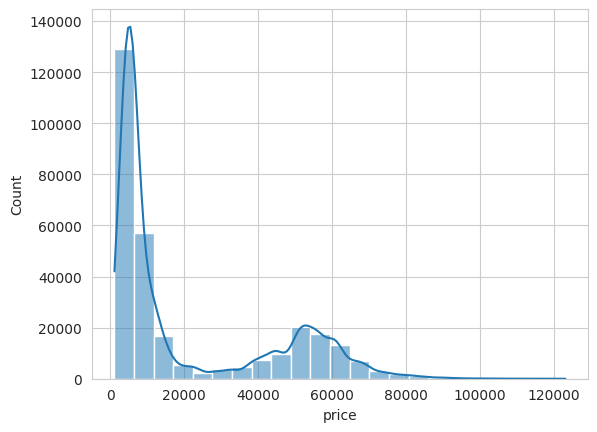

In [128]:
import seaborn as sns
sns.histplot(data=df, x="price", kde=True, bins=23);

In [129]:
#정규분포가 아니라 오른쪽으로 치우친 분포임
#왜도 알아보기
df['price'].skew()

1.0613772532064343

In [130]:
df['price'].kurtosis()

-0.3962927186960772

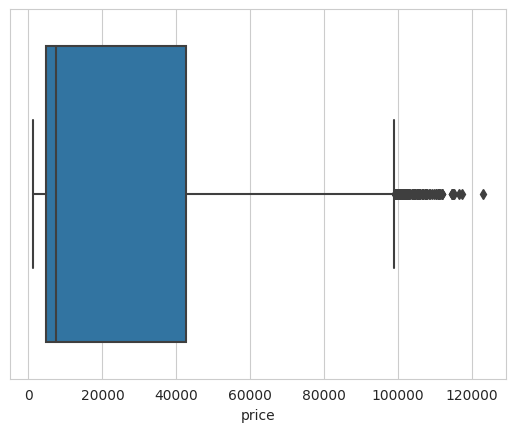

In [131]:
#상자그림
sns.boxplot(x = 'price', data = df);

In [132]:
###IQR규칙으로 이상값 구해서 제거

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

37738.0


In [133]:
###이상값 기준의 상한
Lower = Q1 - 3.0*IQR   # 3*IQR 규칙에 의거한 하한
Upper = Q1 + 3.0*IQR   # 3*IQR 규칙에 의거한 상한
print(Upper)

117997.0


In [134]:
print(Lower)

-108431.0


In [135]:
###이상값 제거하고 남은 데이터를 df1에 저장
df1 = df[df['price'] >= -108434.0]
df1 = df[df['price'] <117997.0]
df1.shape

(300152, 12)

In [136]:
extreme_count1=df[df['price'] >117997.0].count()
extreme_count2=df[df['price'] <= -108434.0].count()
extreme_count=extreme_count1+extreme_count2
print(extreme_count)

Unnamed: 0          1
airline             1
flight              1
source_city         1
departure_time      1
stops               1
arrival_time        1
destination_city    1
class               1
duration            1
days_left           1
price               1
dtype: int64


In [137]:
###이상 값 비율
round(extreme_count / df['price'].count(), 4)

Unnamed: 0         0.000
airline            0.000
flight             0.000
source_city        0.000
departure_time     0.000
stops              0.000
arrival_time       0.000
destination_city   0.000
class              0.000
duration           0.000
days_left          0.000
price              0.000
dtype: float64

In [138]:
###이상값 제거한 왜도와 첨도 구하기
df1['price'].skew()

1.0612239910019639

In [139]:
df1['price'].kurtosis()

-0.3972546839422364

In [140]:
###중위수 구하기
df1['price'].median()

7425.0

In [141]:
###타겟변수 price_b 구성
df1.loc[df1['price'] >= 7425, "price_b"] = 1  
df1.loc[df1['price'] <  7425, "price_b"] = 0   
df1['price_b'].value_counts(dropna=False)       

/tmp/ipykernel_34/3512473504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['price'] >= 7425, "price_b"] = 1


1.000    150638
0.000    149514
Name: price_b, dtype: int64

In [142]:
###price_b비율 분포 구하기
df1['price_b'].value_counts(dropna=False, normalize=True)

1.000   0.502
0.000   0.498
Name: price_b, dtype: float64

In [143]:
df1.shape

(300152, 13)

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300152 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300152 non-null  int64  
 1   airline           300152 non-null  object 
 2   flight            300152 non-null  object 
 3   source_city       300152 non-null  object 
 4   departure_time    300152 non-null  object 
 5   stops             300152 non-null  object 
 6   arrival_time      300152 non-null  object 
 7   destination_city  300152 non-null  object 
 8   class             300152 non-null  object 
 9   duration          300152 non-null  float64
 10  days_left         300152 non-null  int64  
 11  price             300152 non-null  int64  
 12  price_b           300152 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 32.1+ MB


In [145]:
#4.4.6 결측값이 50 초과 변수 제거
df1.isna().any()[lambda x: x]  

Series([], dtype: bool)

In [146]:
###데이터프레임 df에 있는 모든 컬럼(변수)의 결측값 보유 비율을 확인 

df1.isnull().mean().sort_values(ascending=False) 

Unnamed: 0         0.000
airline            0.000
flight             0.000
source_city        0.000
departure_time     0.000
stops              0.000
arrival_time       0.000
destination_city   0.000
class              0.000
duration           0.000
days_left          0.000
price              0.000
price_b            0.000
dtype: float64

In [147]:
df1.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'price_b'],
      dtype='object')

In [148]:
### 구간 변수를 cols1에 저장
cols1 = ['duration','days_left']

In [149]:
#4.4.4 구간변수이상값 제거
Q1 = df1['duration'].quantile(0.25)
Q3 = df1['duration'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

9.340000000000002


In [150]:
Lower = Q1 - 3.0*IQR   # 3*IQR 규칙에 의거한 하한
Upper = Q1 + 3.0*IQR   # 3*IQR 규칙에 의거한 상한
print(Upper)

34.85


In [151]:
print(Lower)

-21.190000000000005


In [152]:
###이상값 제거하고 남은 데이터를 df2에 저장
df2 = df1[df1['duration'] >= -21.190000000000005]
df2 = df1[df1['duration'] <34.85]

In [153]:
Q1 = df2['days_left'].quantile(0.25)
Q3 = df2['days_left'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23.0


In [154]:
Lower = Q1 - 3.0*IQR   # 3*IQR 규칙에 의거한 하한
Upper = Q1 + 3.0*IQR   # 3*IQR 규칙에 의거한 상한
print(Upper)

84.0


In [155]:
print(Lower)

-54.0


In [156]:
###이상값 제거하고 남은 데이터를 df2에 저장
df3 = df2[df2['days_left'] >= -54.0]
df3 = df2[df2['days_left'] <84.0]

In [157]:
df1.shape

(300152, 13)

In [158]:
df3.shape

(299691, 13)

In [159]:
pd.options.display.float_format = '{:.2f}'.format ### 소숫점 2자리로 숫자 표기 제한
df3[cols1].describe()

,duration,days_left
count,299691.00,299691.00
mean,12.18,26.01
std,7.13,13.56
min,0.83,1.00
25%,6.75,15.00
50%,11.25,26.00
75%,16.08,38.00
max,34.83,49.00


In [160]:
df3[cols1].skew()

duration     0.57
days_left   -0.04
dtype: float64

In [161]:
df3[cols1].kurtosis()

duration    -0.40
days_left   -1.16
dtype: float64

In [162]:
#4.5.2 요약 통계 
df3.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'price_b'],
      dtype='object')

In [163]:
df3['days_left'].value_counts(dropna=False)

25    6626
18    6598
39    6589
32    6582
26    6566
24    6531
19    6531
33    6527
40    6527
31    6526
41    6521
28    6514
38    6501
20    6496
30    6496
42    6488
22    6487
36    6484
21    6472
37    6469
43    6467
44    6427
11    6410
34    6407
17    6405
13    6397
23    6395
29    6389
12    6375
27    6355
14    6334
15    6326
45    6309
35    6284
16    6261
46    6152
49    6148
48    6069
47    6062
10    5802
8     5754
6     5726
7     5689
9     5640
5     5384
4     5067
3     4222
2     3996
1     1908
Name: days_left, dtype: int64

In [164]:
pd.crosstab(df3['days_left'], columns='count')

col_0,count
days_left,
1,1908
2,3996
3,4222
4,5067
5,5384
6,5726
7,5689
8,5754
9,5640


In [165]:
pd.crosstab(df3['days_left'], columns='ratio', normalize=True)

col_0,ratio
days_left,
1,0.01
2,0.01
3,0.01
4,0.02
5,0.02
6,0.02
7,0.02
8,0.02
9,0.02


In [166]:
pd.crosstab(df3['days_left'], df3['price_b'])

price_b,0.00,1.00
days_left,,
1,136,1772
2,314,3682
3,359,3863
4,680,4387
5,730,4654
6,854,4872
7,840,4849
8,833,4921
9,727,4913


In [167]:
pd.crosstab(df3['days_left'], df3['price_b'], normalize=True)

price_b,0.00,1.00
days_left,,
1,0.00,0.01
2,0.00,0.01
3,0.00,0.01
4,0.00,0.01
5,0.00,0.02
6,0.00,0.02
7,0.00,0.02
8,0.00,0.02
9,0.00,0.02


In [168]:
# 4.5.4 상관계수 검토
import pandas as pd      
import numpy as np       
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화.
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화.

df3['price_b'].value_counts(normalize=True)

1.00   0.50
0.00   0.50
Name: price_b, dtype: float64

In [169]:
cols2 = ['duration','days_left','price_b'] # 구간 변수를 cols2에 저장 (타겟 변수 포함)
df3[cols2].corr()  # 구간 변수끼리의 상관계수 구하기

,duration,days_left,price_b
duration,1.00,-0.04,0.22
days_left,-0.04,1.00,-0.34
price_b,0.22,-0.34,1.00


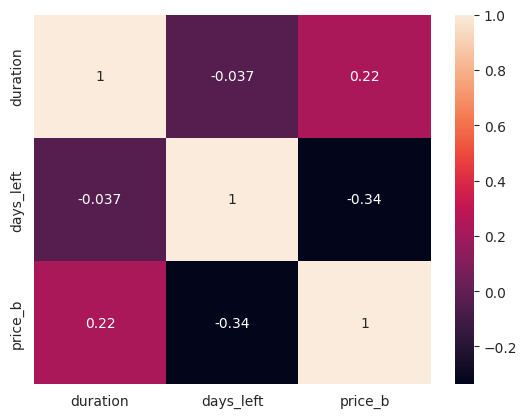

In [170]:
import seaborn as sns

corr = df3[cols2].corr()  
sns.heatmap(data=corr, annot=True);

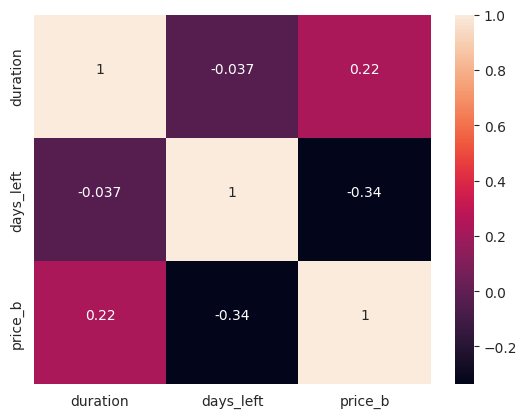

In [171]:
import seaborn as sns

corr = df3[cols2].corr()  

annot_kws = {"ha": 'center',"va": 'bottom'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws);

In [172]:
# 4.5.5 시각화
import matplotlib.pyplot as plt   # matplotlib 라이브러리 호출
%matplotlib inline   

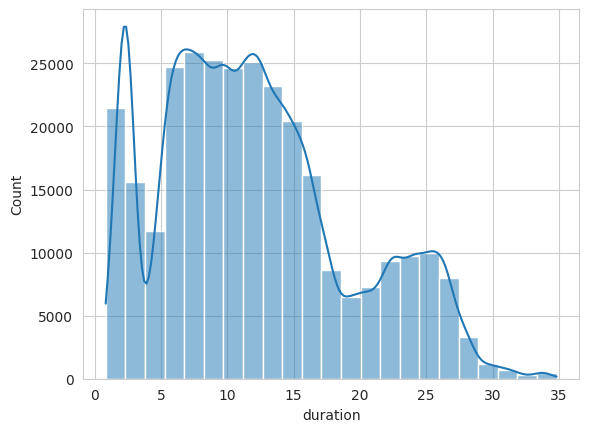

In [173]:
import seaborn as sns
sns.histplot(data=df3, x="duration", kde=True, bins=23);

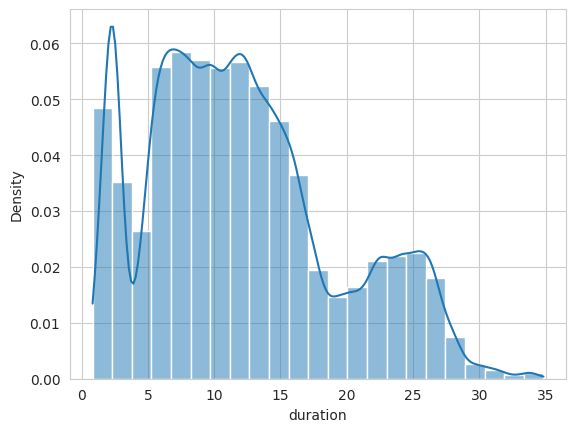

In [174]:
import seaborn as sns
sns.histplot(data=df3, x="duration", kde=True, bins=23,  stat="density"); # 비율로 디스플레이

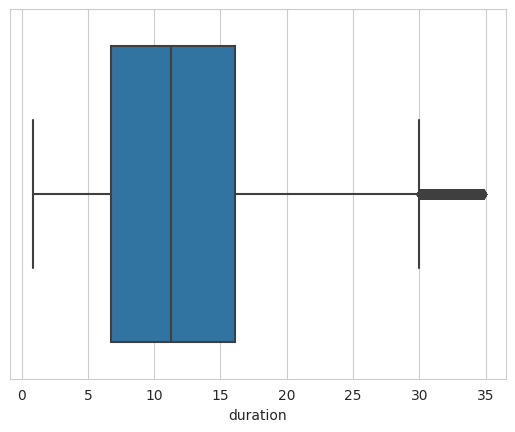

In [175]:
sns.set_style('whitegrid')
axes = sns.boxplot(x ='duration', data = df3)

In [176]:
df3['duration'].describe()

count   299691.00
mean        12.18
std          7.13
min          0.83
25%          6.75
50%         11.25
75%         16.08
max         34.83
Name: duration, dtype: float64

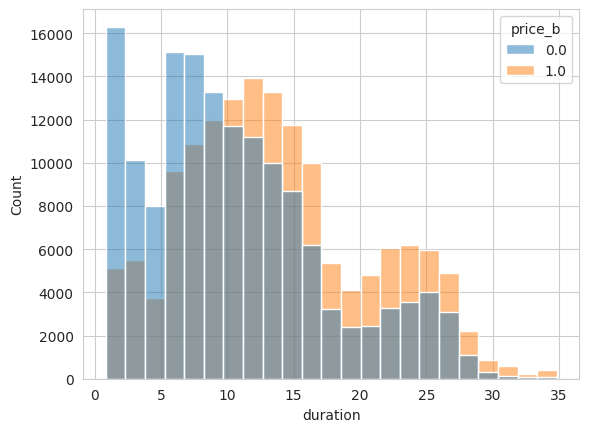

In [177]:
import seaborn as sns
sns.histplot(data=df3, x="duration", hue="price_b", bins=23);

<AxesSubplot: xlabel='price_b', ylabel='duration'>

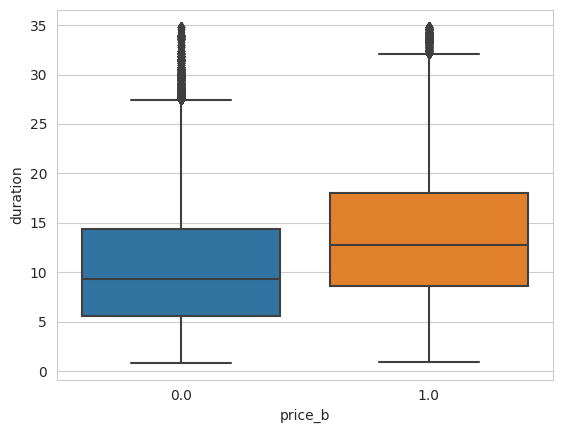

In [178]:
sns.set_style('whitegrid')
sns.boxplot(x = 'price_b', y = 'duration', data = df3) 

In [179]:
group = df3['duration'].groupby(df3['price_b'])
group.mean()

price_b
0.00   10.59
1.00   13.77
Name: duration, dtype: float64

In [180]:
# 4.5.6 t 검정
from scipy import stats

data_1 = df3[df3['price_b'] == 1]['duration']
data_0 = df3[df3['price_b'] == 0]['duration']

stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=125.13826057645649, pvalue=0.0)

In [181]:
data_1 = df3[df3['price_b'] == 1]['days_left']
data_0 = df3[df3['price_b'] == 0]['days_left']

stats.ttest_ind(data_1, data_0) 

Ttest_indResult(statistic=-195.42213379918005, pvalue=0.0)

In [182]:
#범주형 변수
cols3 = ['airline','flight','source_city','departure_time','arrival_time','destination_city','class','stops','price_b']
                             
df3[cols3].isnull().sum()                 

airline             0
flight              0
source_city         0
departure_time      0
arrival_time        0
destination_city    0
class               0
stops               0
price_b             0
dtype: int64

In [183]:
df4 = df3[cols3] 
df4.shape   

(299691, 9)

In [184]:
df4.describe()

,price_b
count,299691.00
mean,0.50
std,0.50
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,1.00


In [185]:
df4.dtypes

airline              object
flight               object
source_city          object
departure_time       object
arrival_time         object
destination_city     object
class                object
stops                object
price_b             float64
dtype: object

In [186]:
#범주형 변수를 숫자로 변경
mapping = {'zero': 0, 'one': 1}
df4 = df4.assign(stops = df4['stops'].map(mapping).fillna(2))
# 'mapping'에 없는 값들은 map() 함수에 의해 NaN으로 변경되며, 이후 fillna(2)에 의해 2로 채워줌

In [187]:
#class는 파이썬의 예약어라서 이름 변경
df4 = df4.rename(columns={'class': 'flight_class'})
mapping = {'Economy': 0, 'Business': 1}
df4['flight_class'] = df4['flight_class'].replace(mapping)


In [188]:
df4['flight_class'].max()

1

In [189]:
mapping = {'Mumbai': 0, 'Delhi': 1}
df4 = df4.assign(destination_city = df4['destination_city'].map(mapping).fillna(2))

In [190]:
mapping = {'Night': 0, 'Evening': 1}
df4 = df4.assign(arrival_time = df4['arrival_time'].map(mapping).fillna(2))

In [191]:
mapping = {'Morning': 0, 'Early_Morning': 1}
df4 = df4.assign(departure_time = df4['departure_time'].map(mapping).fillna(2))

In [192]:
mapping = {'Delhi': 0, 'Mumbai': 1}
df4 = df4.assign(source_city = df4['source_city'].map(mapping).fillna(2))

In [193]:
mapping = {'UK-706': 0, 'UK-772': 1}
df4 = df4.assign(flight = df4['flight'].map(mapping).fillna(2))

In [194]:
mapping = {'Vistara': 0, 'Air_India': 1}
df4 = df4.assign(airline = df4['airline'].map(mapping).fillna(2))

In [195]:
df4.dtypes

airline             float64
flight              float64
source_city         float64
departure_time      float64
arrival_time        float64
destination_city    float64
flight_class          int64
stops               float64
price_b             float64
dtype: object

In [196]:
df4['arrival_time'].value_counts()

2.00    130228
0.00     91291
1.00     78172
Name: arrival_time, dtype: int64

In [197]:
# 도수분포표 검토
pd.options.display.float_format = '{:.3f}'.format
pd.crosstab(df4['arrival_time'], columns='count')   # frequency table 생성(개수 기준)

col_0,count
arrival_time,
0.000,91291
1.000,78172
2.000,130228


In [198]:
pd.crosstab(df4['arrival_time'], columns='ratio', normalize=True)   # frequency table 생성(비율 기준)

col_0,ratio
arrival_time,
0.000,0.305
1.000,0.261
2.000,0.435


In [199]:
pd.crosstab(df4['arrival_time'], df4['price_b'])

price_b,0.000,1.000
arrival_time,,
0.000,44354,46937
1.000,34261,43911
2.000,70761,59467


In [200]:
pd.crosstab(df4['arrival_time'], df4['price_b'], normalize=True)

price_b,0.000,1.000
arrival_time,,
0.000,0.148,0.157
1.000,0.114,0.147
2.000,0.236,0.198


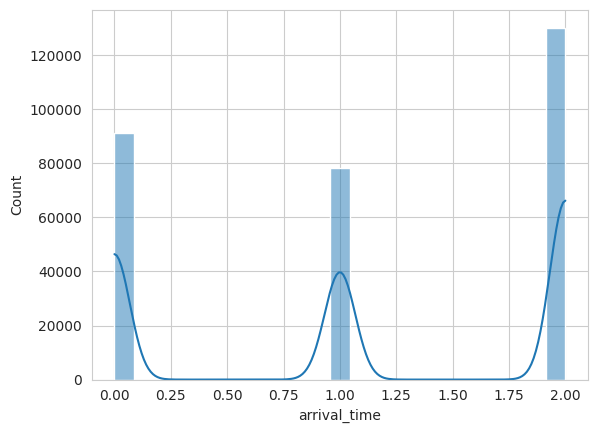

In [201]:
# 4.5.5 시각화
import matplotlib.pyplot as plt   # matplotlib 라이브러리 호출
%matplotlib inline   

import seaborn as sns
sns.histplot(data=df4, x="arrival_time", kde=True, bins=23);

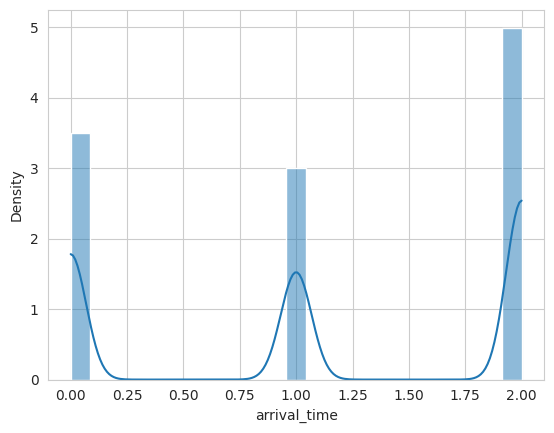

In [202]:
import seaborn as sns
sns.histplot(data=df4, x="arrival_time", kde=True, bins=23,  stat="density"); # 비율로 디스플레이

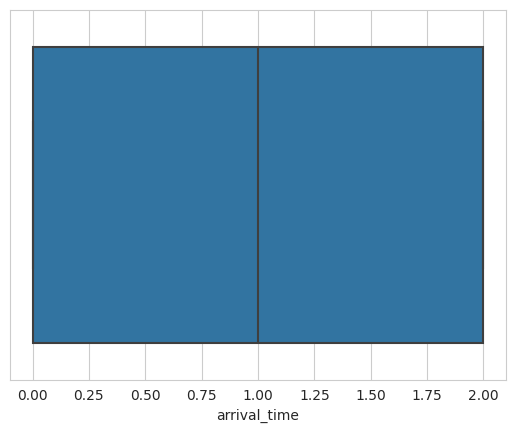

In [203]:
sns.set_style('whitegrid')
axes = sns.boxplot(x ='arrival_time', data = df4)

In [204]:
df4['arrival_time'].describe()

count   299691.000
mean         1.130
std          0.850
min          0.000
25%          0.000
50%          1.000
75%          2.000
max          2.000
Name: arrival_time, dtype: float64

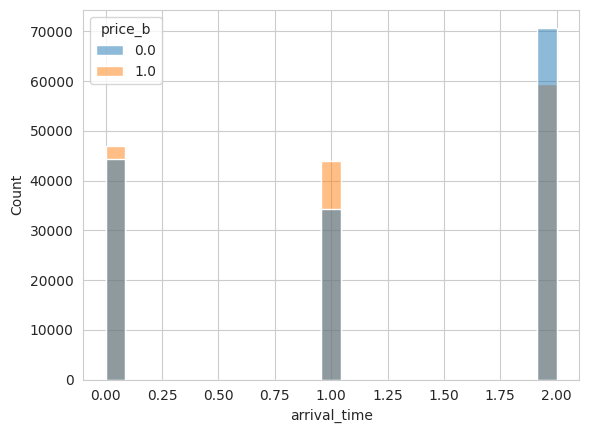

In [205]:
import seaborn as sns
sns.histplot(data=df4, x="arrival_time", hue="price_b", bins=23);

<AxesSubplot: xlabel='price_b', ylabel='arrival_time'>

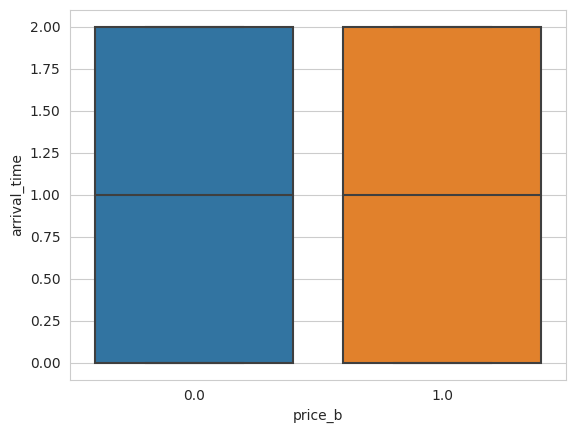

In [206]:
sns.set_style('whitegrid')
sns.boxplot(x = 'price_b', y = 'arrival_time', data = df4) 

In [207]:
df4['flight_class'].value_counts(normalize=True)

0   0.688
1   0.312
Name: flight_class, dtype: float64

In [208]:
#트리모델 실행
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

###학습 세트와 테스트 세트로 분리
X = df4.drop('flight_class', axis=1)
y = df4['flight_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
###의사결정나무 모델을 학습
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [210]:
###테스트 세트에 대한 예측을 수행
y_pred = clf.predict(X_test)

In [211]:
###정확도를 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8785431855719982


In [212]:
###바이너리 형태로 변경
lb = LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
y_pred_lb = lb.transform(y_pred)

###ROC AUC 값을 계산
roc_auc = roc_auc_score(y_test_lb, y_pred_lb, multi_class='ovo')
print("ROC AUC: ", roc_auc)

ROC AUC:  0.9072020618288416


In [213]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler

###피처 데이터 추출
X = df4.drop('flight_class', axis=1)
y = df4['flight_class']

In [214]:
###표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [215]:
###데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [216]:
###모델 학습
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [217]:
###예측
y_pred = clf.predict(X_test)

In [218]:
###성능 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

lb = LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
y_pred_lb = lb.transform(y_pred)

roc_auc = roc_auc_score(y_test_lb, y_pred_lb, multi_class='ovo')
print("ROC AUC: ", roc_auc)

Accuracy:  0.8785431855719982
ROC AUC:  0.9072020618288416


In [219]:
# 로지스틱 회귀 모델 실행 및 성능평가 

from sklearn.linear_model import LogisticRegression

###로지스틱 회귀 모델 학습
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

###예측
y_pred_log = log_reg.predict(X_test)

###성능 평가
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy: ", accuracy_log)

y_test_lb_log = lb.transform(y_test)
y_pred_lb_log = lb.transform(y_pred_log)

roc_auc_log = roc_auc_score(y_test_lb_log, y_pred_lb_log, multi_class='ovo')
print("ROC AUC: ", roc_auc_log)


Accuracy:  0.8532174377283571
ROC AUC:  0.8569131707785727


In [220]:
# 로지스틱 회귀 계수 확인
coefficients = log_reg.coef_

#오즈비 계산
odds_ratio = np.exp(coefficients)
print("Odds Ratio: ", odds_ratio)

Odds Ratio:  [[  0.38252214   1.07355387   0.92582737   1.06811642   1.04562112
    0.95163223   0.50627825 288.83183691]]


In [221]:
#신경망 모델 실행 및 성능평가
from sklearn.neural_network import MLPClassifier

###신경망 모델 생성
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42)

###모델 학습
mlp.fit(X_train, y_train)

###예측
y_pred_mlp = mlp.predict(X_test)

###성능 평가
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy: ", accuracy_mlp)

y_test_lb_mlp = lb.transform(y_test)
y_pred_lb_mlp = lb.transform(y_pred_mlp)

roc_auc_mlp = roc_auc_score(y_test_lb_mlp, y_pred_lb_mlp, multi_class='ovo')
print("ROC AUC: ", roc_auc_mlp)

Accuracy:  0.8782095130048883
ROC AUC:  0.908378469779418


In [222]:
# 랜덤 포레스트 모델 실행 및 성능 평가

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

###모델 학습
rf.fit(X_train, y_train)

###예측
y_pred_rf = rf.predict(X_test)

###성능 평가
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy: ", accuracy_rf)

y_test_lb_rf = lb.transform(y_test)
y_pred_lb_rf = lb.transform(y_pred_rf)

roc_auc_rf = roc_auc_score(y_test_lb_rf, y_pred_lb_rf, multi_class='ovo')
print("ROC AUC: ", roc_auc_rf)


Accuracy:  0.8785431855719982
ROC AUC:  0.9072020618288416


In [223]:
# 연속 변수 타겟 변수 데이터 표준화

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

###타겟 변수와 피처를 분리
X = df4.drop('price_b', axis=1)
y = df4['price_b']

###학습용과 테스트용 데이터셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###표준화
scaler = StandardScaler()

###학습 데이터에 대해 fit과 transform 수행
X_train_scaled = scaler.fit_transform(X_train)

###테스트 데이터에 대해 transform 수행
X_test_scaled = scaler.transform(X_test)


In [224]:
# 선형 회귀 모델

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

###예측
y_pred_lr = linear_regression.predict(X_test_scaled)

###성능 평가 (MSE: Mean Squared Error)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE: ", mse_lr)


Linear Regression MSE:  0.12517667347058892


In [225]:
# 릿지 회귀 모델
ridge_regression = Ridge(alpha=1.0)  # alpha는 regularization strength를 설정합니다.
ridge_regression.fit(X_train_scaled, y_train)

###예측
y_pred_ridge = ridge_regression.predict(X_test_scaled)

###성능 평가 (MSE: Mean Squared Error)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE: ", mse_ridge)

Ridge Regression MSE:  0.1251766776652402


In [226]:
# XGBoost, LightGBM 모델 실행 및 성능평가

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

###XGBoost 모델 학습 및 예측
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

###성능 평가 (MSE: Mean Squared Error)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost MSE: ", mse_xgb)

###LightGBM 모델 학습 및 예측
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train_scaled, y_train)

y_pred_lgbm = lgbm.predict(X_test_scaled)

###성능 평가 (MSE: Mean Squared Error)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print("LightGBM MSE: ", mse_lgbm)

XGBoost MSE:  0.1171964826291649
LightGBM MSE:  0.11729298976716418


In [227]:
#이상 8개 모델에서 챔피언 모델 선정

from sklearn.metrics import mean_squared_error

# 각 모델의 예측 결과에 대한 MSE 계산
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

# 모델의 이름과 해당 모델의 MSE를 딕셔너리에 저장
model_errors = {
    'Decision Tree': mse_dt,
    'Logistic Regression': mse_logreg,
    'Neural Network': mse_nn,
    'Random Forest': mse_rf,
    'Linear Regression': mse_lr,
    'Ridge Regression': mse_ridge,
    'XGBoost': mse_xgb,
    'LightGBM': mse_lgbm
}

# MSE가 가장 작은 모델을 챔피언 모델로 선정
champion_model = min(model_errors, key=model_errors.get)

print("Champion Model: ", champion_model)


Champion Model:  Random Forest
